In [10]:
from cpa_robot import position_x, position_y, orientation, drive, plot_path, reset_robot

In [11]:
reset_robot()

In [12]:
print(position_x(),position_y())

0 0


In [13]:
drive(0.1,0.2)

In [14]:
print(position_x(),position_y())

0.1 0.2


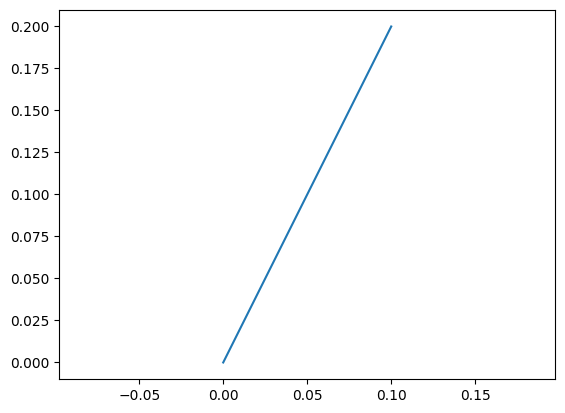

In [15]:
plot_path()

In [16]:
drive(0.3,0.1)

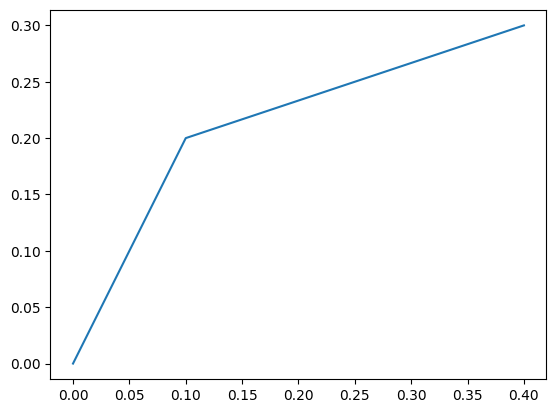

In [17]:
plot_path()